# Pratybos

<code>**1-2 : Perceptronas (numpy)**</code><br>
<code>**3-4 : Neuroninis tinklas (PyTorch)**</code><br>

### Perceptronas (numpy)

Šiame uždavinyje reikės sukurti perceptroną kuris gebėtų optimizuoti modelio parametrus taip kad išspręstu XOR problemą.
Sukurkite generinę klasę <code>**class NN**</code> kurią vėliau taip pat  panaudosite uždavinyje `#2`. Žemiau grafiko illiustracijos rasite šios klasės struktūra kurioje yra šie metodai:

- forward (skaičiavimas pirmyn)
- backward (skaičiavimas argal)
- fit (mokymasis)
- accuracy (tikslumo matavimas)
- plot (grafikus kuriantis metodas)

## #1

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
X = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
])
y = np.array([
    [0],   
    [1],   
    [1],   
    [0]
])

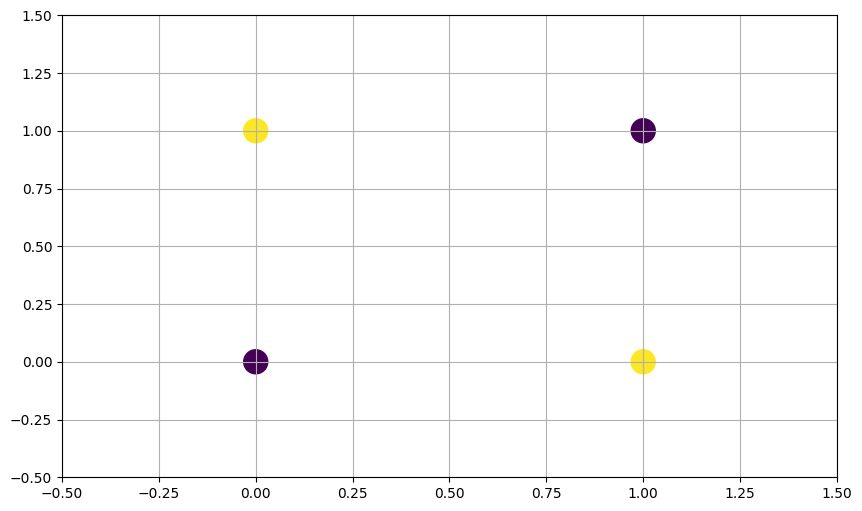

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, s=300)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)

 accuracy: 100.0 %


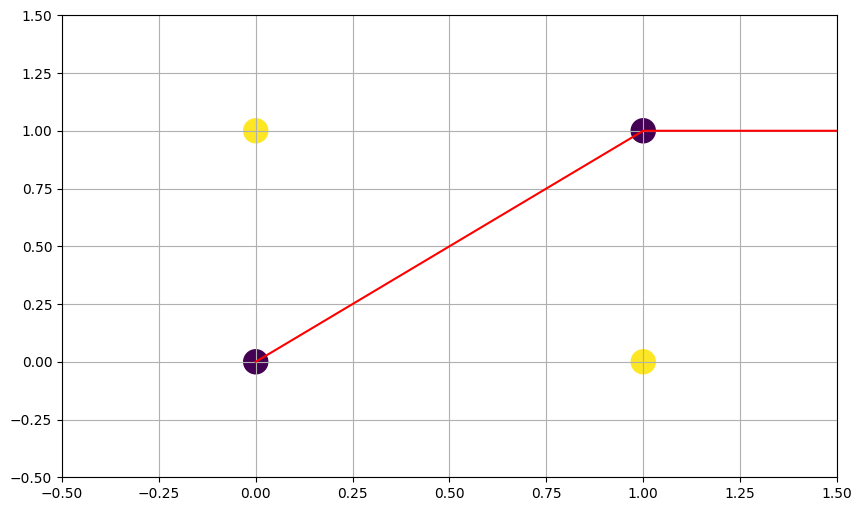

In [34]:
#TODO: Jūsų programa prasideda nuo čia

class NN():
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture    
        
        self.w1 = np.random.normal(0, 1, (_hidden, _input))  # 2x2
        self.w2 = np.random.normal(0, 1, (_output, _hidden)) # 1x2
        self.b1 = np.random.random((_hidden, 1))             # 2x1
        self.b2 = np.random.random((_output, 1))             # 1x1
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        z = X @ self.w2.T
        return self.sigmoid(z)
    
    def backward(self, X):
        act = self.sigmoid(X)
        mat = np.where(act < 0.6, 0, 1)
        mat = np.where(mat[:,1:] + mat[:,:1] != 1, 0,1)
        return mat

    def fit(self, X, y, epochs=25, lr=0.005):
        m, n = X.shape
        for i in range(epochs):
            act = self.forward(X)
            error = act - y
            derivative = X.T @ error
            self.w2 -= (lr/m * derivative).T
    
    def accuracy(self, X, y):
        return np.sum(self.backward(X) == y) / y.size
    
    def plot(self, data):
        plt.figure(figsize=(10,6))
        plt.scatter(X[:,0], X[:,1], c=y, s=300)
        plt.plot(data,'r')
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.grid(True)
        return
       

nn = NN((2,2,1))
nn.fit(X,y)
data = nn.backward(X)
print(f" accuracy: {nn.accuracy(X,y) * 100} %")
plot = nn.plot(data)

## #2

Pernaudokite savo perceptrono klasę išspręsti XOR problemą su didesniu duomenų rinkinių iš `xor_data_II.csv` failo.<br>

In [35]:
data = pd.read_csv('../data_samples/xor_data_II.csv')

In [36]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [37]:
X = data[['x1', 'x2']].values
y = data['y'].values

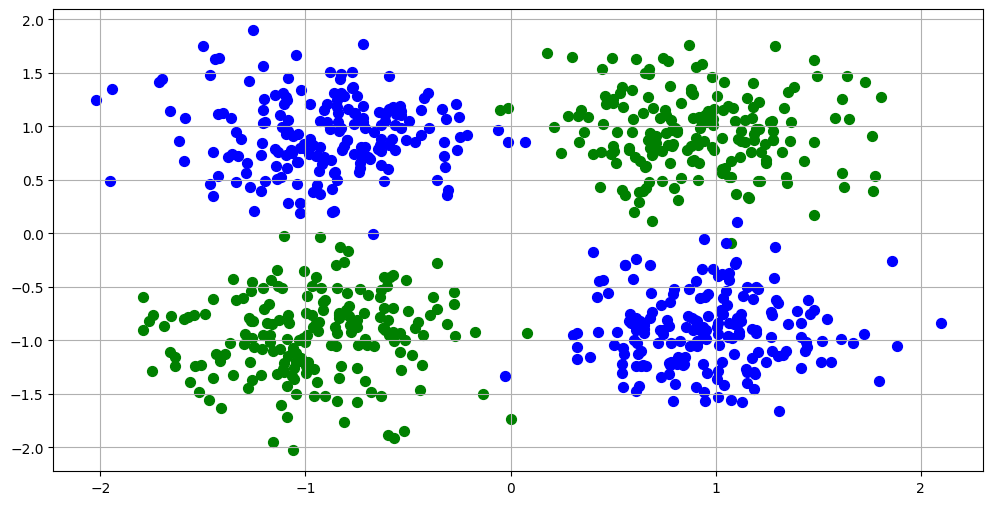

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(*X[y==0].T, c='g', s=50)
plt.scatter(*X[y==1].T, c='b',s=50)
plt.grid(True)

 accuracy: 37500.0 %


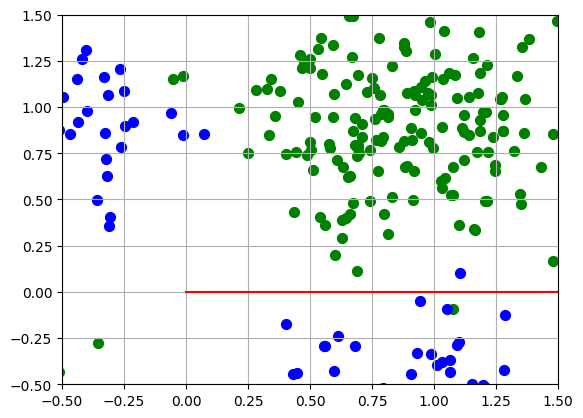

In [39]:
#TODO: Jūsų programa prasideda nuo čia
class NN():
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture    
        
        self.w1 = np.random.normal(0, 1, (_hidden, _input))  # 2x2
        self.w2 = np.random.normal(0, 1, (_output, _hidden)) # 1x2
        self.b1 = np.random.random((_hidden, 1))             # 2x1
        self.b2 = np.random.random((_output, 1))             # 1x1
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        z = X.T @ self.w2.T
        return self.sigmoid(z)
    
    def backward(self, X):
        act = self.sigmoid(X)
        mat = np.where(act < np.average(np.unique(act)), 0, 1)
        # for a, b in mat: 
        #     if a + b == 1:  a = 1
        #     else:           a = 0 
            # print(a)
        mat = np.where(mat[:,1:] + mat[:,:1] != 1, 0,1)
        # print(mat) 
        return mat

    def fit(self, X, y, epochs=25, lr=0.005):
        m, n = X.shape
        for i in range(epochs):
            act = self.forward(X)
            error = act - y
            derivative = X @ error
            self.w2 -= sum(lr/m * derivative)
    
    def accuracy(self, X, y):
        return np.sum(self.backward(X) == y) / y.size
    
    def plot(self, data):
        # plt.figure(figsize=(12,6))
        plt.scatter(*X[y==0].T, c='g', s=50)
        plt.scatter(*X[y==1].T, c='b',s=50)
        plt.plot(data,'r')
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.grid(True)
        return



n,m = X.shape
nn = NN((2,n,1))
nn.fit(X,y,300)
data = nn.backward(X)
print(f" accuracy: {nn.accuracy(X,y) * 100} %")
plot = nn.plot(data)


### Neuroninis tinklas (PyTorch)

## #3

Atlikite tą patį uždavinį (sukurti perceptrono generinę klasę kuri gali išspręsti XOR problemą) taikydami `PyTorch` biblioteką.

epoch: 001...456 | cost: 0.6916
epoch: 101...456 | cost: 0.6828
epoch: 201...456 | cost: 0.6728
epoch: 301...456 | cost: 0.6578
epoch: 401...456 | cost: 0.6336
Trukmė:0.01 min


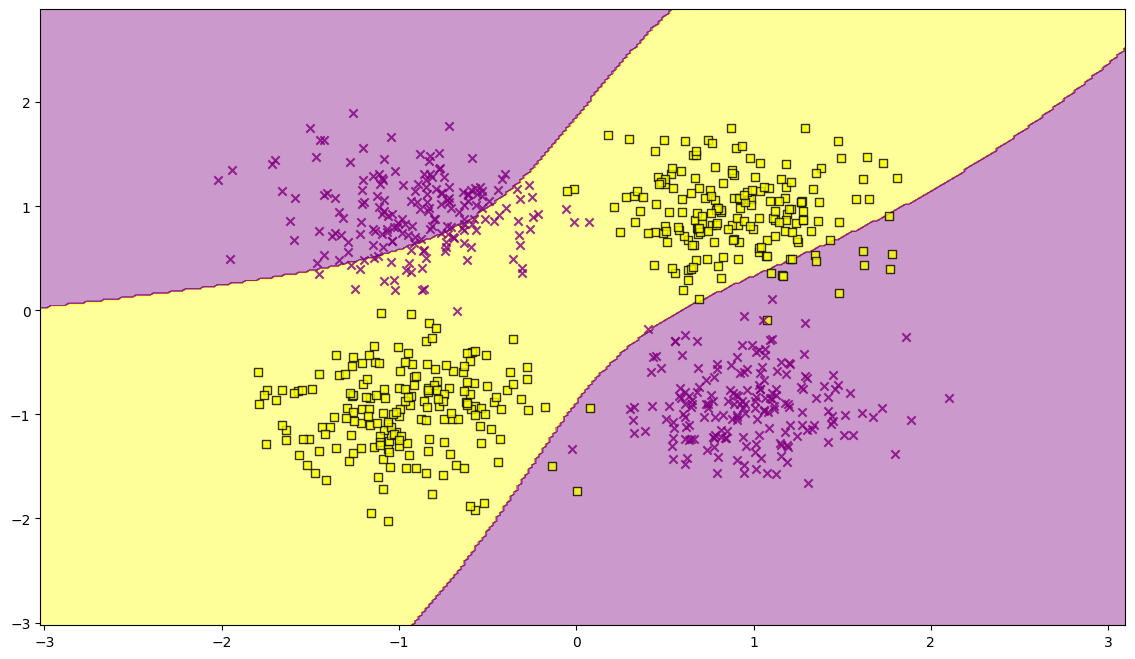

In [40]:
#TODO: Jūsų programa prasideda nuo čia
import time
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

DEVICE     = 'cpu'
NUM_EPOCHS = 456

class NN_torch(torch.nn.Module):
    def __init__(self, num_features, num_hidden_1, num_classes):
        super(NN_torch, self).__init__()        
        self.num_classes = num_classes        
        self.linear_1   = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)    
        
    def forward(self, x):        
        out = self.linear_1(x)
        out = F.sigmoid(out)
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas
    
    def backward(self, lr):
        return torch.optim.SGD(self.parameters(), lr=0.1)
    
    def fit(self, X, y, lr):
        optimizer = self.backward(lr=0.1)
        start_time     = time.time()
        minibatch_cost = []

        features = torch.tensor(X, dtype=torch.float).to(DEVICE)
        targets  = torch.tensor(y, dtype=torch.long).to(DEVICE)

        for epoch in range(NUM_EPOCHS):
            logits, probas = model(features)
            cost           = F.cross_entropy(logits, targets)
            optimizer.zero_grad()
            cost.backward()
            minibatch_cost.append(cost)
            optimizer.step()
            if (epoch % 100 == 0):
                print (f'epoch: {epoch+1:03d}...{NUM_EPOCHS:03d} | cost: {cost:.4f}')
        print(f'Trukmė:{((time.time() - start_time)/60):.2f} min')
        
    def plot(self, X, y, resolution=0.02):
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('yellow', 'purple', 'green', 'white', 'black')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
        logits, probas = self.forward(tensor)
        Z = np.argmax(probas.detach().numpy(), axis=1)
        Z = Z.reshape(xx1.shape)

        plt.figure(figsize=(14,8))
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, color=cmap(idx),
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)

model = NN_torch(num_features=2, num_hidden_1=50, num_classes=2)
model = model.to(DEVICE)

model.fit(X, y, lr=0.1)
model.plot(X, y)




## #4

Pritaikykite savo neurininio tinklo modelį spręsti `mnist` klasifiakcijos problemą. Duomenys rasite 
`data_samples/mnist` kataloge

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
Epoch: 001/010 | Batch 000/008 | Cost: 2.4936
Epoch: 001/010  kaina: 2.5156
epochos laikas: 0.01 min
Epoch: 002/010 | Batch 000/008 | Cost: 2.2238
Epoch: 002/010  kaina: 2.4247
epochos laikas: 0.01 min
Epoch: 003/010 | Batch 000/008 | Cost: 2.1773
Epoch: 003/010  kaina: 2.3109
epochos laikas: 0.02 min
Epoch: 004/010 | Batch 000/008 | Cost: 2.0991
Epoch: 004/010  kaina: 2.2161
epochos laikas: 0.02 min
Epoch: 005/010 | Batch 000/008 | Cost: 1.7969
Epoch: 005/010  kaina: 2.1198
epochos laikas: 0.03 min
Epoch: 006/010 | Batch 000/008 | Cost: 1.8841
Epoch: 006/010  kaina: 2.0185
epochos laikas: 0.03 min
Epoch: 007/010 | Batch 000/008 | Cost: 1.7904
Epoch: 007/010  kaina: 1.9338
epochos laikas: 0.04 min
Epoch: 008/010 | Batch 000/008 | Cost: 1.6894
Epoch: 008/010  kaina: 1.8328
epochos laikas: 0.04 min
Epoch: 009/010 | Batch 000/008 | Cost: 1.6737
Epoch: 009/010  kaina: 1.7575
epochos laikas: 0.05 mi

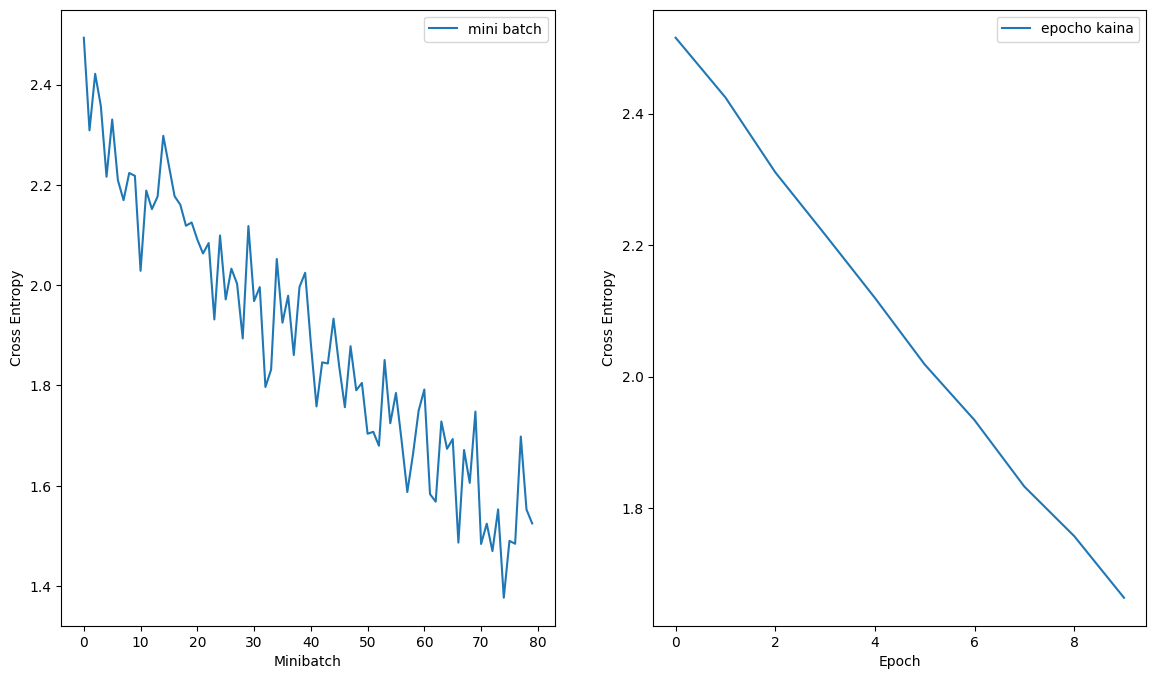

In [41]:
#TODO: Jūsų programa prasideda nuo čia

import os
import time
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

BATCH_SIZE = 100
NUM_EPOCHS = 10
DEVICE     = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DATADIR = f'../data_samples/mnist'

def testImage(image_path):
    im = Image.open(image_path)
    plt.imshow(im, cmap='binary');
    print('Masyvo matmenys', im_array.shape)
    print(np.array(im))

class DuomenuKrautuvas(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['File Name']
        self.y = df['Class Label']
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir, self.img_names[index]))
        
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[index]
        return img, label

    def __len__(self):
        return self.y.shape[0]

totensor      = transforms.Compose([transforms.ToTensor()])

train_dataset = DuomenuKrautuvas(csv_path=f'{DATADIR}/mnist_train.csv',img_dir=f'{DATADIR}/mnist_train/', transform=totensor)
train_loader  = DataLoader(dataset=train_dataset, batch_size=32, drop_last=True, shuffle=True, num_workers=0) 

valid_dataset = DuomenuKrautuvas(csv_path=f'{DATADIR}/mnist_valid.csv',img_dir=f'{DATADIR}/mnist_valid/',transform=totensor)
valid_loader  = DataLoader(dataset=valid_dataset, batch_size=100, shuffle=False, num_workers=0)

test_dataset  = DuomenuKrautuvas(csv_path=f'{DATADIR}/mnist_test.csv', img_dir=f'{DATADIR}/mnist_test/', transform=totensor)
test_loader   = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False, num_workers=0)
    
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
minibatch_cost = []
epoch_cost = []
    
class MLP(torch.nn.Module):    

    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()

        self.linear_out = torch.nn.Linear(num_hidden, num_classes)
        self.linear_out.weight.detach().normal_(0.0, 0.1)
        self.linear_out.bias.detach().zero_()    
   
    def forward(self, x):
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        logits = self.linear_out(out)
        return logits #, probas
    
    def compute_loss(self, data_loader):
        curr_loss = 0.
        with torch.no_grad():
            for cnt, (features, targets) in enumerate(data_loader):
                features = features.view(-1, 28*28).to(DEVICE)
                targets = targets.to(DEVICE)
                logits = self(features)
                loss = F.cross_entropy(logits, targets)
                curr_loss += loss
            return float(curr_loss)/cnt    
    
    def fit(self, train_loader, lr=0.1):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.1)
        start_time = time.time()
        #Nunulinam:
        minibatch_cost = []
        epoch_cost = []
    
        for epoch in range(NUM_EPOCHS):
            self.train()
            for batch_idx, (features, targets) in enumerate(train_loader):

                features = features.view(-1, 28*28).to(DEVICE)
                targets = targets.to(DEVICE)

                logits = self(features)

                cost = F.cross_entropy(logits, targets)
                optimizer.zero_grad()

                cost.backward()

                optimizer.step()

                minibatch_cost.append(cost.item())
                if not batch_idx % 50:
                    print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                           %(epoch+1, NUM_EPOCHS, batch_idx, 
                             len(train_loader), cost.item()))

            cost = self.compute_loss(train_loader)
            epoch_cost.append(cost)
            print('Epoch: %03d/%03d  kaina: %.4f' % (
                    epoch+1, NUM_EPOCHS, cost))
            print(f'epochos laikas: {((time.time() - start_time)/60):.2f} min')
            
        print(f'visas laikas: {((time.time() - start_time)/60):.2f} min')
        return minibatch_cost, epoch_cost
       
    
    def accuracy(self, data_loader):   
        correct_pred, num_examples = 0, 0
        with torch.no_grad():
            for features, targets in data_loader:
                features = features.view(-1, 28*28).to(DEVICE)
                targets = targets.to(DEVICE)
                logits = self.forward(features)
                predicted_labels = torch.argmax(logits, 1)
                num_examples += targets.size(0)
                correct_pred += (predicted_labels == targets).sum()
            return correct_pred.float()/num_examples * 100
    
    def plot(self,minibatch_cost,epoch_cost):
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,8))
        ax[0].plot(range(len(minibatch_cost)), minibatch_cost, label='mini batch')
        ax[0].set_ylabel('Cross Entropy')
        ax[0].set_xlabel('Minibatch')
        ax[1].plot(range(len(epoch_cost)), epoch_cost, label='epocho kaina')
        ax[1].set_ylabel('Cross Entropy')
        ax[1].set_xlabel('Epoch')
        ax[0].legend()
        ax[1].legend()

        

model = MLP(num_features=28*28, num_hidden=100, num_classes=10)
model = model.to(DEVICE)

minibatch_cost, epoch_cost = model.fit(train_loader, lr=0.1)

model.plot(minibatch_cost,epoch_cost)
    
print(f'Treniravimo tikslumas: {model.accuracy(train_loader):.2f}')
print(f'Testavimo    tikslumas: {model.accuracy(test_loader):.2f}')

<code>**Šių uždavinų užbaigimo terminas iki 12/05 (imtinai). Sekmės!**</code>